# Mini-Project A - Prices & Returns

## 1 Imports & Config

In [1]:
import sys, pandas as pd, yfinance as yf, numpy as np, matplotlib.pyplot as plt, arch
print("Notebook running from:", sys.executable)

Notebook running from: c:\Tools\miniconda3\envs\quant\python.exe


## 2 Download or Load Data

In [2]:
from pathlib import Path
import pandas as pd, yfinance as yf

# -------------------Configuration-------------------
TICKERS     = ["RIO", "GOOGL", "SPY", "MELI"]
START_DATE  = "2014-01-01"           # 10-year window
END_DATE    = None                   # today
DATA_PATH   = Path("../data/raw_yfinance")
DATA_PATH.mkdir(parents=True, exist_ok=True)
CACHE_FILE  = DATA_PATH / "prices_10y.parquet"

# -------------------Load Data-------------------
prices = yf.download(
        TICKERS,
        start=START_DATE,
        end=END_DATE,
        auto_adjust=True,
        progress=False,
        group_by="column"
    )

# Keep only the 'Close' level and drop rows with all-Na
prices = prices["Close"].dropna(how="all")


prices.head()

Ticker,GOOGL,MELI,RIO,SPY
Date,,,,
2014-01-02,27.723312,101.719162,24.293839,150.283508
2014-01-03,27.521076,102.230652,24.166674,150.258896
2014-01-06,27.827915,99.830513,23.478201,149.823456
2014-01-07,28.364393,97.489456,23.057222,150.743607
2014-01-08,28.423418,97.843559,22.991444,150.776459


## 3 Quick Inspect

In [3]:
print("Shape:", prices.shape)
display(prices.head())
print("Missing values total:", prices.isna().sum().sum())


Shape: (2871, 4)


Ticker,GOOGL,MELI,RIO,SPY
Date,,,,
2014-01-02,27.723312,101.719162,24.293839,150.283508
2014-01-03,27.521076,102.230652,24.166674,150.258896
2014-01-06,27.827915,99.830513,23.478201,149.823456
2014-01-07,28.364393,97.489456,23.057222,150.743607
2014-01-08,28.423418,97.843559,22.991444,150.776459


Missing values total: 0


## 4 Compute Log Returns

In [4]:
import numpy as np

# 4 Compute Log Returns
returns = np.log(prices / prices.shift(1))
returns = returns.dropna()               # drop the first NaN row

print("Shape of returns:", returns.shape)
display(returns.head())
print("Missing values total:", returns.isna().any().any())

Shape of returns: (2870, 4)


Ticker,GOOGL,MELI,RIO,SPY
Date,,,,
2014-01-03,-0.007322,0.005016,-0.005248,-0.000164
2014-01-06,0.011088,-0.023758,-0.028902,-0.002902
2014-01-07,0.019095,-0.023730,-0.018093,0.006123
2014-01-08,0.002079,0.003626,-0.002857,0.000218
2014-01-09,-0.009677,-0.009596,-0.021009,0.000653


Missing values total: False


## 5 Plot Prices vs Returns

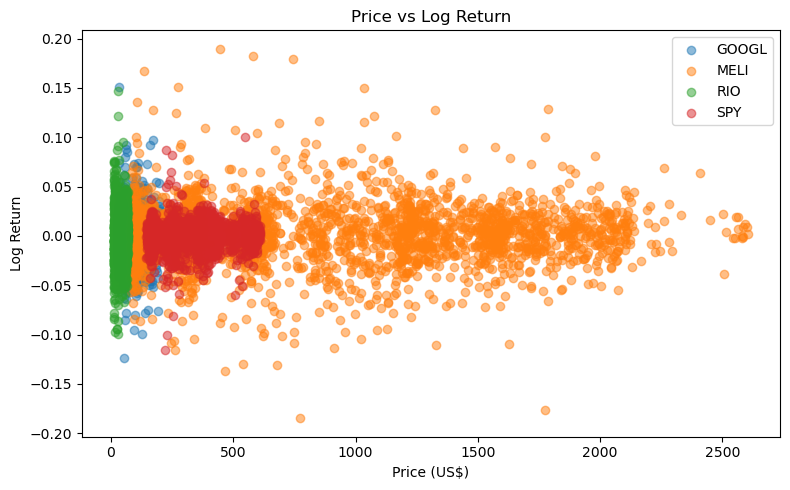

In [5]:
# 5 Plot Prices vs Returns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
for ticker in prices.columns:
    x = prices[ticker].iloc[1:],
    y = returns[ticker],
    plt.scatter(
        x=x,
        y=y,
        label=ticker,
        alpha=0.5)

plt.xlabel("Price (US$)")
plt.ylabel("Log Return")
plt.title("Price vs Log Return")
plt.legend()
plt.tight_layout()
plt.show()

## 6 Compounded Growth Chart

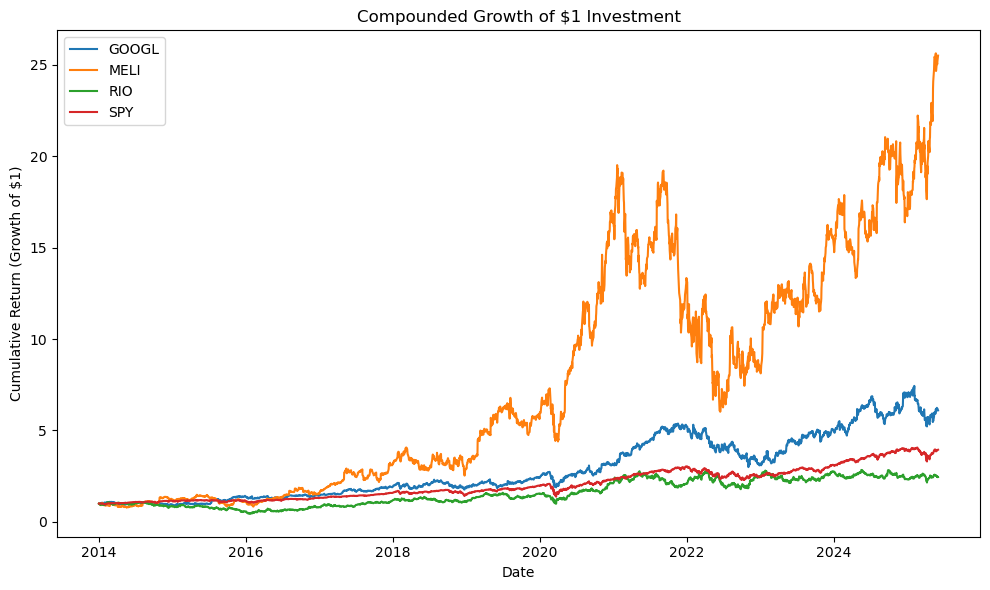

Ticker         GOOGL       MELI       RIO       SPY
Date                                               
2014-01-03  0.992705   1.005028  0.994766  0.999836
2014-01-06  1.003773   0.981433  0.966426  0.996939
2014-01-07  1.023124   0.958418  0.949098  1.003062
2014-01-08  1.025253   0.961899  0.946390  1.003280
2014-01-09  1.015380   0.952712  0.926715  1.003936
...              ...        ...       ...       ...
2025-05-27  6.236628  25.119848  2.502692  3.933566
2025-05-28  6.217150  25.076003  2.467704  3.910808
2025-05-29  6.199115  25.024685  2.477995  3.926246
2025-05-30  6.194787  25.199677  2.446299  3.921854
2025-06-02  6.097035  25.496080  2.452474  3.943946

[2870 rows x 4 columns]


In [6]:
# 6 – Extra Exercise: Compounded Growth Chart
#    Plot the cumulative, compounded return (growth of $1) for each ticker
#    using the `prices` DataFrame you just downloaded in Step 2.

import matplotlib.pyplot as plt

# 1. Compute simple daily returns and drop the first NaN
returns = prices.pct_change().dropna()

# 2. Build compounded growth from a $1 starting point
cum_growth = (1 + returns).cumprod()

# 3. Plot
fig, ax = plt.subplots(figsize=(10, 6))
for ticker in cum_growth.columns:
    ax.plot(cum_growth.index, cum_growth[ticker], label=ticker)

ax.set_xlabel("Date")
ax.set_ylabel("Cumulative Return (Growth of $1)")
ax.set_title("Compounded Growth of $1 Investment")
ax.legend()
plt.tight_layout()
plt.show()

print(cum_growth)


## 7 Next Steps

### 7.1 Descriptive statistics

In [7]:
# 7.1 Descriptive stats
stats = returns.describe().T
stats["skew"]   = returns.skew()
stats["kurt"]   = returns.kurtosis()
stats


,count,mean,std,min,25%,50%,75%,max,skew,kurt
Ticker,,,,,,,,,,
GOOGL,2870.0,0.000788,0.017815,-0.116341,-0.007769,0.001100,0.009707,0.162584,0.208350,6.463542
MELI,2870.0,0.001571,0.029849,-0.168789,-0.012894,0.001560,0.015977,0.208910,0.458601,5.782434
RIO,2870.0,0.000515,0.020146,-0.094237,-0.010758,0.000745,0.011259,0.157881,0.246451,3.609985
SPY,2870.0,0.000540,0.011093,-0.109424,-0.003691,0.000652,0.005796,0.105019,-0.308158,14.265150


### 7.2 Correlation matrix

Ticker     GOOGL      MELI       RIO       SPY
Ticker                                        
GOOGL   1.000000  0.443928  0.310215  0.715344
MELI    0.443928  1.000000  0.289954  0.537335
RIO     0.310215  0.289954  1.000000  0.531281
SPY     0.715344  0.537335  0.531281  1.000000


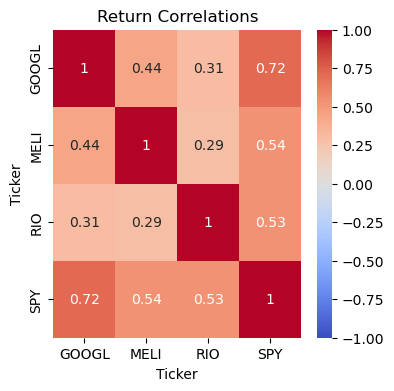

In [8]:
# 7.2 Correlations
corr = returns.corr()
print(corr)

import seaborn as sns
plt.figure(figsize=(4,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Return Correlations")
plt.show()


### 7.3 Rolling volatility

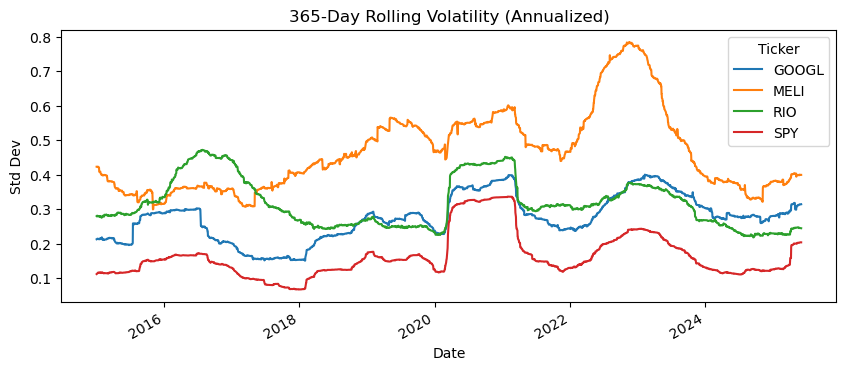

In [9]:
# 7.3 Rolling vol (annualized)
rol_std = returns.rolling(window=252).std() * np.sqrt(252)
rol_std.plot(figsize=(10,4))
plt.title("365-Day Rolling Volatility (Annualized)")
plt.ylabel("Std Dev")
plt.show()


### 7.4 Return distributions

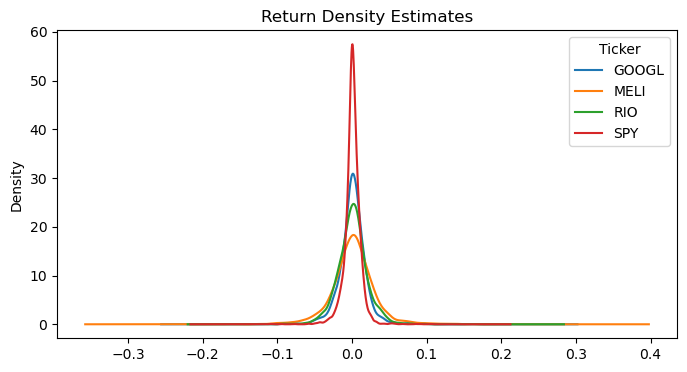

In [10]:
# 7.4 Return distributions
returns.plot(kind="kde", figsize=(8,4))
plt.title("Return Density Estimates")
plt.show()

